In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("Crop_recommendation.csv")

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
df['label'] = pd.Categorical(df['label']).codes
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [7]:
df['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5], dtype=int8)

In [8]:
X = df.drop(['label'],axis=1).values
y = df['label'].values

print(X.shape, y.shape)

(2200, 7) (2200,)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_raw, y_train, y_raw = train_test_split(X, y, test_size=0.4)
X_test, X_val, y_test, y_val = train_test_split(X_raw, y_raw, test_size=0.3)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)
print('Val', X_val.shape, y_val.shape)

Train (1320, 7) (1320,)
Test (616, 7) (616,)
Val (264, 7) (264,)


In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
inputs = keras.Input((7,))

x = keras.layers.Reshape((7, 1))(inputs)
x = keras.layers.LSTM(48)(x)
x = keras.layers.Dense(24, activation="gelu")(x)
outputs = keras.layers.Dense(22, activation="softmax")(x)

model = keras.Model(inputs, outputs)
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 48)                  │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 24)                  │           1,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 22)                  │             550 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,326 (44.24 KB)

 Trainable params: 11,326 (44.24 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

Epoch 1/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9786 - loss: 0.0603 - val_accuracy: 0.9740 - val_loss: 0.0855
Epoch 2/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9832 - loss: 0.0492 - val_accuracy: 0.9805 - val_loss: 0.0618
Epoch 3/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9914 - loss: 0.0352 - val_accuracy: 0.9497 - val_loss: 0.1367
Epoch 4/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9813 - loss: 0.0602 - val_accuracy: 0.9756 - val_loss: 0.0733
Epoch 5/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9818 - loss: 0.0586 - val_accuracy: 0.9773 - val_loss: 0.0623
Epoch 6/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9908 - loss: 0.0532 - val_accuracy: 0.9773 - val_loss: 0.0689
Epoch 7/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9862 - loss: 0.0488 - val_accuracy: 0.9870 - val_loss: 0.0560
Epoch 8/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9868 - loss: 0.0470 - val_accuracy: 0.9692 - val_loss:

In [27]:
y_pred = model.predict(X_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [53]:
y_test[20]

21

In [49]:
np.argmax(y_pred[20])

21

In [51]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels[:5]

[6, 8, 7, 1, 16]

In [55]:
y_test[:5]

array([ 6,  8,  7,  1, 16], dtype=int8)

In [57]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

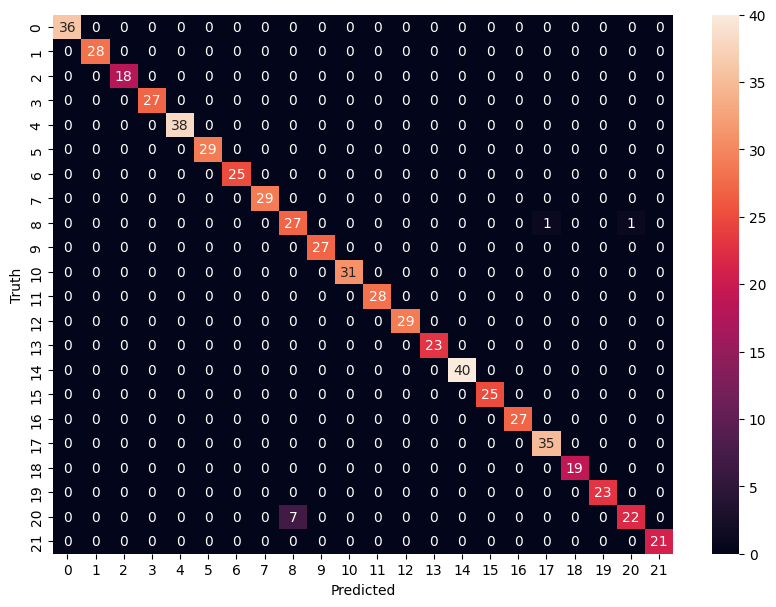

In [61]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        29
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        29
           8       0.79      0.93      0.86        29
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        29
          13       1.00      1.00      1.00        23
          14       1.00      1.00      1.00        40
          15       1.00      1.00      1.00        25
          16       1.00      1.00      1.00        27
  

In [79]:
crop = {
    20: 'rice', 
    11: 'maize', 
    3: 'chickpea', 
    9: 'kidneybeans', 
    18: 'pigeonpeas', 
    13: 'mothbeans', 
    14: 'mungbean', 
    2: 'blackgram', 
    10: 'lentil', 
    19: 'pomegranate', 
    1: 'banana', 
    12: 'mango', 
    7: 'grapes', 
    21: 'watermelon', 
    15: 'muskmelon', 
    0: 'apple', 
    16: 'orange', 
    17: 'papaya', 
    4: 'coconut', 
    6: 'cotton', 
    8: 'jute', 
    5: 'coffee'
}

In [77]:
np.argmax(model.predict(np.array([[90,40,43,21,82,6,202]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


20

In [81]:
crop.get(np.argmax(model.predict(np.array([[90,40,43,21,82,6,202]]))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'rice'

In [89]:
crop.get(np.argmax(model.predict(np.array([[11,71,17,20,12,5.6,61]]))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'kidneybeans'

In [91]:
crop.get(np.argmax(model.predict(np.array([[117,34,25,24.83,56.76,7.2,124]]))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


'coffee'

In [93]:
# model.save("Recommendation.h5")